# CSCI 3343 Lab 1: Linear Algebra for Digital Images

**Posted:** Monday, August 30, 2021

**Due:** Friday, September 3, 2021

__Total Points__: 0.5 (counted as extra credits)

__Name__:
Dawin Ye, yedg

(e.g. Donglai Wei, weidf)

__Submission__: please rename the .ipynb file as __\<your_username\>_lab1.ipynb__ before you submit it to canvas. Example: weidf_lab1.ipynb.

Acknowledgement: Parts adapted from http://cs231n.github.io/python-numpy-tutorial/
 and http://6.869.csail.mit.edu/sp21/schedule.html

# Learning Goals

## Key Concepts
- Matrix Manipulation (Numpy library)
- Image As A Matrix/Tensor (ImageIO/Matplotlib library)

## Application: Write a Program to Find Waldo
Where's Wally? (called Where's Waldo? in North America) is a British series of children's puzzle books created by English illustrator Martin Handford. The books consist of a series of detailed double-page spread illustrations depicting dozens or more people doing a variety of amusing things at a given location. Readers are challenged to find a character named Wally hidden in the group. [source: wikipedia](https://en.wikipedia.org/wiki/Where%27s_Wally%3F)

In 2021, Waldo is following the social distancing rule [(source: Clay Bennett)](https://www.timesfreepress.com/cartoons/2020/mar/17/much-easier/4269/), which makes our task much easier.

<img src="https://static.boredpanda.com/blog/wp-content/uploads/2020/03/where-is-waldo-coronavirus-edition-book-5-5e73257690fa2__700.jpg">

We have three exercises in total and you can get 0.5 extra credit if you get all of them correct. 

Alright, let's jump right in by mounting the unzipped folder in Google Drive. [(Colab tutorial)](https://cs231n.github.io/setup-instructions/#working-remotely-on-google-colaboratory).

#  Part 1. Matrix Manipulation

Numpy is a numerical library that provides **_tons_** of useful functions for scalar, array, and matrix types. We'll only go into a small scratch of numpy.

**Why numpy instead of regular `for` loops**? \
In addition to the convenience of not redesigning the wheel, much of Numpy is built directly in C++ and is well optimized, so it runs *very* fast

Let's import numpy now! It is customary to call it `np`, since you need to reference it a lot.

In [ ]:
import numpy as np

## Arrays, Matrices, and Tensors

### Array
One of the most important primitives in numpy is the `np.array` - this represents a fixed-size array (or list) of elements.

Unlike Python lists, numpy arrays **MUST HAVE THE SAME TYPE**. The types allowed by numpy are below. Note that you have greater control over how much space is used by each datatype than Python primitives:
- float16, float32, float64 (decimal values)
- int8, int16, int32, int64 (integers)
- uint8, uint16, uint32, uint64 (unsigned, or positive, integers)
- bool (boolean)
- complex64, complex128 (Complex numbers, represented as 2 floats)

All of these types have a default size that you can access with `np.float`, `np.int`, and so on.

Let's make an array from a Python list!

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print("A is", a)
print("Object Type:",type(a))

A is [1 2 3 4 5 6 7 8]
Object Type: <class 'numpy.ndarray'>


Let's see what type numpy inferred from our data

In [ ]:
a.dtype

dtype('int64')

We can access elements of an array using the same `[]` notation we're used to. We can even use negatives to index from the end, and make slices.

In [ ]:
print(a[1])
print(a[-1])
print(a[0:6:2]) # index start from 0, end at 6, step = 2

2
8
[1 3 5]


Since arrays have a fixed size, we can get this size as a tuple using the `shape` attribute - you can't set this though!

In [ ]:
print(a.shape)

(8,)


We can also change elements of the array - we just can't add new elements

In [ ]:
a[0] = 100
print(a)

[100   2   3   4   5   6   7   8]


Since `a` and `b` are numpy arrays, we can do math with them now! These operations, by default, will happen out-of-place (a new array will be created to store the result)

In [ ]:
print("Numpy math:")
print(a[:3],"+",a[-3:],"=",a[:3] + a[-3:])

# If they weren't numpy arrays
print("\nVanilla Python List math:")
print(list(a),"+",list(a[:3]),"=",list(a) + list(a[:3]))

Numpy math:
[100   2   3] + [6 7 8] = [106   9  11]

Vanilla Python List math:
[100, 2, 3, 4, 5, 6, 7, 8] + [100, 2, 3] = [100, 2, 3, 4, 5, 6, 7, 8, 100, 2, 3]


This is a small example, but we'll soon see more complicated operations numpy arrays can perform!

### Matrix
We can also make matrices, by simply giving the constructor the correct shape of data

In [ ]:
my_matrix = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
print(my_matrix)

[[1 2 3]
 [4 5 6]]


Now, using shape will be more helpful - note that you couldn't get this shape with a Python list!

In [ ]:
print(my_matrix.shape)

(2, 3)


We can access matrix elements using each of their indices in order. (All dimensions are 0-indexed)

In [ ]:
print(my_matrix[0,2]) # Get row 0, column 2. The order of these indices matches their respective maximums in shape.

3


We can still use slices, and negative indexing. Slicing a row or column from a matrix gives us a 1d array!

In [ ]:
# Get row 0, all columns except the last one
print(my_matrix[0,:-1])

# Get columns 1 and 2.
print(my_matrix[:, 1:3])

[1 2]
[[2 3]
 [5 6]]


We can also still index into this as an outer-array

In [ ]:
# Gets the 0th element of the outer array - that's the 0th row!
print(my_matrix[0])

[1 2 3]


**NOTE:** Matrices in numpy MUST be rectangular. Unlike nested Python lists, which can have the first list contain 1 element, and the second list contain 3 elements, in a numpy matrix, all rows have to have the same length. In other words, the matrix cannot be "jagged"

So, we can actually shape these 6 elements into whatever shape we want! This can be useful to create high dimensional arrays.

In [ ]:
my_reshaped_matrix = my_matrix.reshape((3,2))
my_reshaped_matrix

array([[1, 2],
       [3, 4],
       [5, 6]])

Unless you explicitly use `np.copy`, Reshapes and slices create *views* of your data - that is, they all reference the same data! So, since the variables are all aliases to the same data, changes to one will reflect in all the others! This is a double-edged sword that can boost your performance, but might catch you off guard.

In [ ]:
print("Original my_matrix")
print(my_matrix)
print("Original my_reshaped_matrix")
print(my_reshaped_matrix)

# Change an element
print("===MAKING A CHANGE===")
my_matrix[0,0] = 100 - my_matrix[0, 0]

print("New my_matrix")
print(my_matrix)
print("New my_reshaped_matrix")
print(my_reshaped_matrix)

Original my_matrix
[[1 2 3]
 [4 5 6]]
Original my_reshaped_matrix
[[1 2]
 [3 4]
 [5 6]]
===MAKING A CHANGE===
New my_matrix
[[99  2  3]
 [ 4  5  6]]
New my_reshaped_matrix
[[99  2]
 [ 3  4]
 [ 5  6]]


### The third dimension and beyond

We were able to add a dimension to a 1d array to make a 2d matrix.
In fact, numpy can handle even more dimensions! 
In computer vision, we often will use 3 dimensions worth of data (Height x Width x 3 colors)

A "matrix" with 3 or more dimensions is called a *Tensor*.  
Let's make a 2 x 3 x 4 tensor (2 stacked 3x4 matrices)

In [ ]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4)
print(my_tensor)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


We can use a tensor like any matrix or array

In [ ]:
# Get the 0th matrix slice, the 1st row of that matrix, and the 2nd column of that row
print(my_tensor[0,1,2])

6


## Array Creation
Numpy also provides several convenience functions to help you make make empty ndarrays

In [ ]:
desired_shape = (2,3)

Some useful ones:
- zeros: Creates an array filled with zeros
- ones: An array of ones
- eye: The identity matrix I (needs 1 integer for square size)
- full: Fills with an element
- np.random.random: Random between 0 and 1

In [ ]:
print(np.zeros(desired_shape)          , '\n')
print(np.ones(desired_shape)           , '\n')
print(np.eye(3)                        , '\n')
print(np.full(desired_shape, 7)        , '\n')
print(np.random.random(desired_shape)  , '\n')

[[0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[7 7 7]
 [7 7 7]] 

[[0.25962896 0.91560089 0.09199179]
 [0.39765641 0.28321485 0.05899995]] 



If you want to create an array ranging from 0 to 10

In [ ]:
np.arange(10+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Array Indexing

We've already done a lot of indexing into arrays above, but let's look at some more details

In [ ]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4).astype(np.int)
my_tensor

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

### Getting Elements
We can get elements by fully specifying the index

In [ ]:
my_tensor[0,1,2]

6

If we partially specify the index (in order), since this is a list-of-lists, basically, we'll get "rows" (or matrices, if taking parts of a tensor

In [ ]:
my_tensor[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
my_tensor[0, 0]

array([0, 1, 2, 3])

By this logic, we can also keep adding square brackets (get the matrix, then the row, then the column).

In [ ]:
my_tensor[0][0]

array([0, 1, 2, 3])

We can also use standard slice notation. Again, we don't have to specify all the dimensions

In [ ]:
my_tensor[0, 0:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

### Setting elements

We can set elements that we index to

In [ ]:
my_tensor[0, 0, 0] = 100
my_tensor

array([[[100,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

We can also set blocks / slices that we index into, as long as the shapes match! (some more details: this copies values, no longer references)

In [ ]:
# Get the 0th matrix slice. Rows 1 and 2. Get every other column starting from 0
my_tensor[0,1:3,0::2]

array([[ 4,  6],
       [ 8, 10]])

In [ ]:
replacement = (np.eye(2, dtype=np.int) + 2) * 100
replacement

array([[300, 200],
       [200, 300]])

In [ ]:
my_tensor[0, 1:3, 0::2] = replacement
my_tensor

array([[[100,   1,   2,   3],
        [300,   5, 200,   7],
        [200,   9, 300,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

We can also use a boolean tensor of the same size to index the tensor. For example, if we want to set everything smaller than 5 to 1 in the tensor.

In [ ]:
my_tensor[my_tensor < 5] = 1


## Elementwise- and Matrix Math

Indexing and creating arrays is cool, but the real power of Numpy is doing math using those arrays.

The basic mathematical operators (+, -, /, \*, %) are treated as "elementwise" operators - they do something with each element. Which operands are used depends on a concept called "broadcasting". In practice - if you have two ndarrays of the same shape, then the operands will be corresponding elements in each ndarray. Otherwise, if possible, the smaller ndarray/scalar is repeated to be the same size as the larger array.

In [ ]:
a = np.array(range(10)).reshape(2,5)
b = np.array(range(100,1100,100)).reshape(2,5)
print("a =",  a  )
print("b =",  b  )

a = [[0 1 2 3 4]
 [5 6 7 8 9]]
b = [[ 100  200  300  400  500]
 [ 600  700  800  900 1000]]


Operate on corresponding elements of a and b

In [ ]:
a + b

array([[ 100,  201,  302,  403,  504],
       [ 605,  706,  807,  908, 1009]])

In [ ]:
a * b

array([[   0,  200,  600, 1200, 2000],
       [3000, 4200, 5600, 7200, 9000]])

We can also use scalars as operands, which will be "broadcast" to every element.

In [ ]:
a * 2

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [ ]:
b % 3

array([[1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1]])

## Exercise 1 (4 pt)
**Grading students**
The class CSCI 3343 has `num_students` students. Each student has `num_grades` grades, one for each assignment. 
The staff store our grades in a numpy ndarray, of shape `(num_students, num_grades)`. (Each row is a student, each column is an assignment)

(a) [1 pt] Create an ndarray of the proper shape to hold the grades table, and fill it with random values between 60 and 100. Hint: check out `np.random.random()` from above

In [ ]:
num_students = 4
num_grades = 5

#### TODO: create the matrix
desired_shape = (num_students,num_grades)
grades_table = np.random.randint(60,100,(num_students,num_grades))
print(grades_table)

[[87 90 92 93 94]
 [98 72 62 94 91]
 [71 90 89 95 86]
 [92 83 90 87 97]]


(b) [1 pt] We have a meeting with Yufan, whose student index is `2`, and want to see how he's doing in the class. Use ndarray slicing to get an array containing all of his grades.

In [ ]:
#### TODO: select a row
yufan_grades = grades_table[1]
print('Yufan\'s grade is:', yufan_grades)


Yufan's grade is: [98 72 62 94 91]


(c) [1 pt] Donglai wants to know if PSet 4 (assignment index 4) is too hard. Use ndarray slicing to extract the whole classes grades for PSet 4.

In [ ]:
#### TODO: select a column
pset4_grades = grades_table[:,3]
print('Pset4 grades are:', pset4_grades)

Pset4 grades are: [93 94 95 87]


(d) [1 pt] Donglai wants to give everyone 10 points as extra credits (yay!) Please update the grades table and cap the maximum points as 100 (i.e., for grades more than 100, set them to 100)

In [ ]:
#### TODO: change the grades_table values
grades_table = grades_table + 10
grades_table[grades_table > 100] = 100
print(grades_table)

[[ 97 100 100 100 100]
 [100  82  72 100 100]
 [ 81 100  99 100  96]
 [100  93 100  97 100]]


# Part 2. Image As A Matrix/Tensor

In gerenal, there are two major ways to store an image:
- Bitmap (bmp/png/jpg) <img height=30 src="https://logos-world.net/wp-content/uploads/2020/11/Adobe-Photoshop-Logo.png">: A bitmap represents an image as a rectangle grid of small **squares** (i.e., **pixel**), each with its own singe-color. With the size of squares becomes smaller, we begin to perceive the blocky squares as a smooth image.
- Vector graphics (svg) <img height=30 src="https://adobe.arizona.edu/sites/default/files/styles/uaqs_large/public/Adobe-Illustrator.jpg">: A vector grapic represents an image as points on a 2D plane, which are connected by lines and curves to form polygons and other shapes. These geomtric shapes may have various properties including values for stroke color, curve, thickness, and fill.

Throughout the course, we will use the **bitmap** representation:

- Advantage: Easy to create and manipulate! 
- Disadvantage: As shown in the image below, the bitmap image suffers from aliasing problem when upscaled, as the number of pixels are fixed. In contrast, the vector graphic does not have the aliasing problem, as its geometric shapes can be rendered with however number of pixels needed.


<img height=300 src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/VectorBitmapExample.svg/373px-VectorBitmapExample.svg.png" />


In [ ]:
# download the waldo image
! wget https://static.boredpanda.com/blog/wp-content/uploads/2020/03/where-is-waldo-coronavirus-edition-book-5-5e73257690fa2__700.jpg -O waldo.jpg

--2021-09-06 19:49:24--  https://static.boredpanda.com/blog/wp-content/uploads/2020/03/where-is-waldo-coronavirus-edition-book-5-5e73257690fa2__700.jpg
Resolving static.boredpanda.com (static.boredpanda.com)... 65.8.185.96, 65.8.185.113, 65.8.185.5, ...
Connecting to static.boredpanda.com (static.boredpanda.com)|65.8.185.96|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.boredpanda.com/blog/wp-content/uploads/2020/03/where-is-waldo-coronavirus-edition-book-5-5e73257690fa2__700.jpg [following]
--2021-09-06 19:49:24--  https://www.boredpanda.com/blog/wp-content/uploads/2020/03/where-is-waldo-coronavirus-edition-book-5-5e73257690fa2__700.jpg
Resolving www.boredpanda.com (www.boredpanda.com)... 65.8.249.23, 65.8.249.13, 65.8.249.69, ...
Connecting to www.boredpanda.com (www.boredpanda.com)|65.8.249.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82921 (81K) [image/jpeg]
Saving to: ‘waldo.jpg’

waldo.jpg    

## Reading

Image read/write can be messy in Python with many different uncompatible implementations available. We will use a light-weight and user-friendly library `imageio`.


In [ ]:
import imageio
waldo = imageio.imread('waldo.jpg')

Images are represented as numpy arrays!

In [ ]:
type(waldo), waldo.shape, waldo.dtype

(imageio.core.util.Array, (461, 700, 3), dtype('uint8'))

## Channels, Image Formats, and using images as arrays
The shape of a color image is (height, width, colors RGB).

In [ ]:
waldo.shape

(461, 700, 3)

You can see each pixel is represented by 3 values (uint8 means they are between 0 and 255)

In [ ]:
waldo[0,0] # Get the pixel located at (0,0) from the top left

Array([189, 226, 232], dtype=uint8)

Color images consist of "channels" - each color we can render is some combination of red, green, and blue (OR, in the case of a grayscale image, gray).

There are other sets of channels - you'll learn about these in the Color lecture!

By default, color images are opened by imageio as RGB, meaning the values for a given pixel are ordered "red, green, blue".

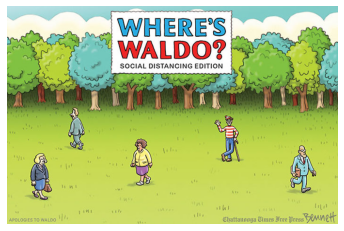

In [ ]:
import matplotlib.pyplot as plt
# let's create a wrapper function to format the display
def imshow(image):
  # cmap is overwritten with the input is a RGB image
  plt.imshow(image, cmap='gray')
  # no axis
  plt.axis('off')
  plt.show()

imshow(waldo)

## Image patch as a submatrix

With matrix indexing, we can create a sub-matrix, which corresponds to an image patch. Below, we provide the demo function `getPatchByYX` to return an image patch given the top-left and bottom-right pixel positions. Let's crop out the patch that contains Waldo! 

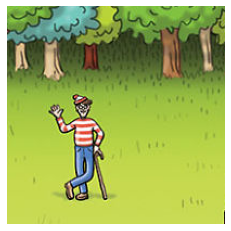

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# (a) crop the eagle: get image patch
def getPatchByYX(image, y0, x0, y1, x1):
  # https://numpy.org/doc/stable/user/basics.indexing.html#other-indexing-options
  # top-left position: (y0,x0)
  # bottom-right position: (y1,x1)

  # naive version:
  # return image[y0: y1+1, x0 : x1+1]

  # if the top-left pixel position is negative, we round it to 0
  # if the bottom-right pixel is outside the image size, it automatically rounds to the border position  
  return image[max(0, y0): y1+1, max(0, x0) : x1+1]

## Unit test: crop out the eagle from the image

top_left = np.array([150, 400])
bottom_right = np.array([350, 600])
waldo_patch = getPatchByYX(waldo, top_left[0], top_left[1], bottom_right[0], bottom_right[1])
# Plot image
plt.imshow(waldo_patch)
plt.axis('off')
plt.show()  

## Writing an Image

The `imwrite` function can write out an image. Let's write out the image we just made, so we can use it later!

In [ ]:
output_path = "catch_ya_waldo.png"
imageio.imwrite(output_path, waldo_patch)

We should be able to read that image directly from the file. Let's try!

Read file of shape: (201, 201, 3) type uint8


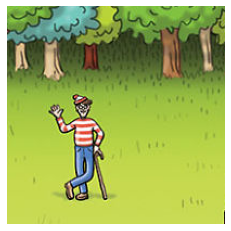

In [ ]:
test_read_output = imageio.imread(output_path)
print("Read file of shape:",test_read_output.shape, "type",test_read_output.dtype)
imshow(test_read_output)

Everything works as expected!

## Exercise 2 (1 pt)



(a) [1 pt] Finish the function `getPatchByCenterSize` to return the image patch at a specific center with a specific size=(patch_height, patch_width).

Hint: you can re-use the function `getPatchByYX` above.

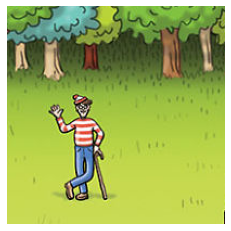

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt

def getPatchByCenterSize(image, center, size):
  #### TODO: return the patch given its center and size
  # hint: you can call getPatchByYX
  return getPatchByYX(image, center[0]-(size[0]//2),center[1]-(size[1]//2), center[0]+(size[0]//2), center[1]+(size[1]//2))
  

## Unit-test: should be the same as the above
patch_center = (top_left + bottom_right) // 2
patch_size = bottom_right - top_left
im_patch = getPatchByCenterSize(waldo, patch_center, patch_size)
# Plot image
plt.imshow(im_patch)
plt.axis('off')
plt.show()

# Part 3. Let's Find Waldo

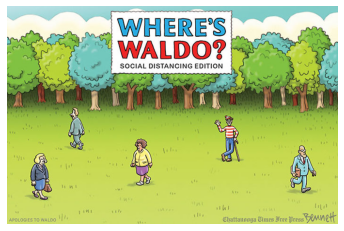

In [ ]:
imshow(waldo)

## Step 1: Find the foreground
You may notice that the red-stripe color on Waldo's shirt is quite unique. The red stripes' RGB value has the mean (225, 100, 100), varying between -30 and +30 from the mean for each channel. Please compute the "Waldo-ness" for each pixel by checking if its RGB value is within such color range.

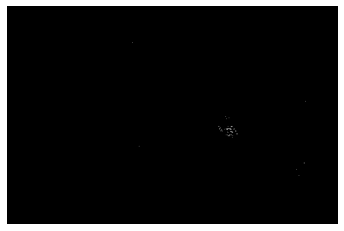

In [ ]:
waldo_shirt = [225,  100,  100]
rgb_range = 30

# mask matrix: start from all "True"
mask = (waldo[:,:,0] > -1)
for c in range(3):
  mask = mask * (waldo[:,:,c] > waldo_shirt[c]-rgb_range)
  mask = mask * (waldo[:,:,c] < waldo_shirt[c]+rgb_range)

# should be 0 elsewhere except pixels on Waldo's shirt
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

## Step 2: Find the most probable location
There are some outlier pixels that are within the color range. Let's find Waldo's body by finding the pixel that has the maximum sum of "Waldo-ness" within a 11$\times$11 patch centered at it.

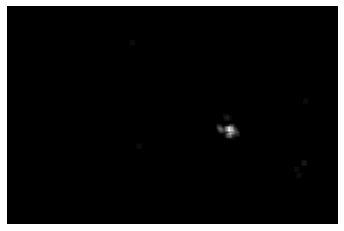

In [ ]:
im_size = mask.shape
patch_size = [11, 11]

waldo_body = waldo[:,:,0].copy()
waldo_body[:] = 0

for y in range(im_size[0]):
  for x in range(im_size[1]):
    # for the border cases, let's simply ignore the outside pixels
    # Indexing warning: arr[-1] is acutally the arr[len(arr)-1]. Thus, we round the negative positions to 0
    # arr[BIG_NUMBER] will automatically round up to arr[len(arr)-1]
    mask_patch = getPatchByCenterSize(mask, [y, x], patch_size)
    # Compute the sum of Waldo-ness
    waldo_body[y, x] = (mask_patch==1).sum()

# visualize the Waldo-ness heatmap: should be bright around Waldo and dark elsewhere
plt.imshow(waldo_body, cmap='gray')
plt.axis('off')
plt.show()

## Step 3: Visualize it!

The waldo_body heatmap looks reasonable. Let's plot the maximum location of the heatmap upon the original image to see if your code detects Waldo successfully!


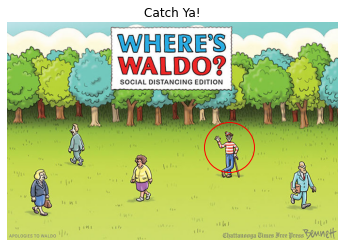

In [ ]:
### Helper function to visualize your detection result

import math
# Find the maximum (which treats image as an 1D array)
# (It's in the horizontal scanning order, that is going through row-by-row from top to bottom)
maxima = waldo_body.argmax()
# Convert the 1D array location to (y, x)
maxima_x = maxima % im_size[1] # number of pixels in the last row
maxima_y = maxima // im_size[1] + (maxima_x != 0) # how many rows

plt.imshow(waldo);
plt.plot(maxima_x, maxima_y, 'ro', markersize = 50, fillstyle = 'none')
plt.axis('off');
plt.title('Catch Ya!')
plt.show()

## Exercise 3 (1 pt)
What you implement above is a fundamental concept, called `Filtering`, which applies the same function to all patches of the input image (more in Lecture 4). Specifically, for each pixel `p` in the output matrix, we assign its value as $I_p \cdot \mathbf{1}$, where $I_p$ is the input image patch that centered at $p$ and $\mathbf{1}$ is an all-one matrix. 

The `Filtering` is a powerful tool to transform images. Let's implement one for image denoising. 

In [ ]:
# download the corrupted waldo image
! wget https://csci3343.github.io/f21/src/public_image/waldo_noisy.png

--2021-09-06 19:49:32--  https://csci3343.github.io/f21/src/public_image/waldo_noisy.png
Resolving csci3343.github.io (csci3343.github.io)... 185.199.110.153, 185.199.109.153, 185.199.108.153, ...
Connecting to csci3343.github.io (csci3343.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83265 (81K) [image/png]
Saving to: ‘waldo_noisy.png’

waldo_noisy.png     100%[===================>]  81.31K  --.-KB/s    in 0.03s   

2021-09-06 19:49:32 (3.05 MB/s) - ‘waldo_noisy.png’ saved [83265/83265]



OH NO!!! The Waldo image patch suffers from the black pixel attack !!! it looks quite noisy now :(

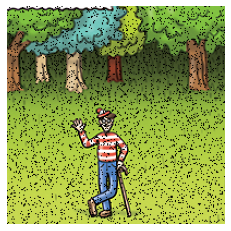

In [ ]:
im_waldo_noisy = imread('waldo_noisy.png')
plt.imshow(im_waldo_noisy); plt.axis('off')
plt.show()

(a) [1 pt] Implement the Median Filter. That is, for each patch, we assign the output pixel value as the median value of the input image patch.

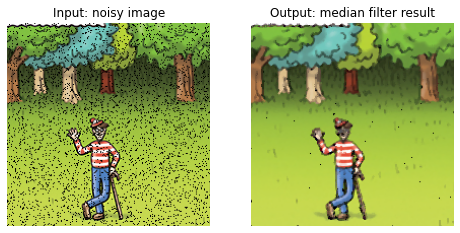

In [ ]:
# Let's see how the Median filter can denoise it
im_noisy_size = im_waldo_noisy.shape
im_waldo_median = im_waldo_noisy.copy()

patch_size = [3,3]
for y in range(im_noisy_size[0]):
  for x in range(im_noisy_size[1]):
    # get each image patch
    im_patch = getPatchByCenterSize(im_waldo_noisy, [y, x], patch_size)
    
    for c in range(3):
      patch_arr = im_patch[:,:,c].reshape(-1)
      #### TODO: compute the median for each channel of the patch
      im_waldo_median[y,x,c] = np.median(patch_arr)

plt.figure(figsize=(8, 12)) 
plt.subplot(1,2,1); plt.imshow(im_waldo_noisy); plt.axis('off'); plt.title('Input: noisy image')
plt.subplot(1,2,2); plt.imshow(im_waldo_median); plt.axis('off'); plt.title('Output: median filter result')
plt.show()